# Увод и опис проблема

У овој вежбанци ћемо се бавити анализом сателитских снимака Земље у циљу идентификације намена површина. У различитим применама је од интереса идентификовати која је реална намена земљишта (ораница, шума, насеље, индустрија...). Стручна особа може увидом у сателитске снимке извршити овакву иднетификацију намене земљишта, али је у том случају то мукотрпан и скуп посао, подложан грешкама, а који је тешко и неисплативо редовно радити. Као вид вештачке интелигенције, ми ћемо користити моделе машинског учења ради аутоматске анализе намене земљишта са датог сателитског снимка.

## Сентинел 2 - мисија ЕСА

Kao извор података ћемо користити мисију Европске Свемирске Агенције (ЕСА), која руководи свемирским програмом Европске Уније. ЕСА оперише са већим бројем сателита који врше посматрање Земље у циљу различитих примена. Нама је од интереса Сентинел 2, што је група од два идентична сателита која посмарају континенталне и облане пределе у светлосном спектру. Ми ћемо ради интуитивности користити само обсервације у видљивом спектру (дакле, слике у боји), мада су доступни и снимци на таласним дужинама ван видљивог спектра, као што су рецимо инфрацрвени таласи.

Снимци које даје Сентинел 2 у видљивом спектру светлости су са резолуцијом од 10 метара, а иста тачка на површини Земље се изнова снима у интервалу од око 5 дана. Оно што је од посебног интереса нама је да су наравно и подаци за Србију потпуно доступни.

Европска Свемирска Агенција је у оквиру прогарам Коперникус омогућила бестплатан приступ Сентинел 2 подацима како за некомерцијалне, тако и за комерцијалне сврхе уз једину обавезу навођења извора - што ћемо и учинити овде: У овој вежбанци користимо Коперникус Сентинел податке из 2021. године.

Пример испод је исечак који садржи град Шабац и реку Саву. Кроз примере, објашњења и python код у овој вежбанци ћемо научити како да овакву слику учитамо из Сентинел 2 обсервација али и како да применимо модел вештачке интелигенције за њену аутоматску обраду у смислу идентификације намене земљишта.

Можете ли да уочите различте намене земшита на њој? Да ли разликујете насеље од индустријске зоне?

![Шабац](data/example_sabac.png)

## Анализа путем машинског учења

Као што смо навели, желимо да решимо проблем идентификације намене земљишта на основу сателитског снимка у боји. Могуће је замислити различите једноставне алгоритме који би овај проблем могли решавати. На пример, можемо просто рећи да ако у региону доминира зелена боја то је шума, док ако доминира плава боја то је река.

Овде смо уочили да је доминантна боја у региону параметар од значаја, овакви параметри се у машинском учењу зову **обележја**. Поред боје могли би смо уочити и обележја која се тичу постојања паралелних линија у региону што би могло да укаже на оранице. 

Могуће је уочити и друга обележја од интереса - погледајте примере испод и размислите која?

<table>
  <tr>
    <td><img src="data/example_crop.png" ></td>
    <td><img src="data/example_industrial.png"></td>
    <td><img src="data/example_residential.png"></td>
    <td><img src="data/example_forest.png"></td>
    <td><img src="data/example_water.png"></td>
   </tr> 
   <tr>
     <td style="text-align: center;">Ораница</td>
     <td style="text-align: center;">Индустрија</td>
     <td style="text-align: center;">Насеље</td>
     <td style="text-align: center;">Шума</td>
     <td style="text-align: center;">Вода</td>
  </tr>
</table>

Класичан приступ машинском учењу подразумева да инжењер или научник сам дизајнира обележја на сличан начин као што смо горе урадили, док сам модел машинског учења корз статистичке постуке анализира које комбинације и експерсије обележја најбоље одговорај свакој од класа коју желимо да предвидимо.

Савремен приступ машинском учењу подразумева такозвано **дубоко учење** или **учење репрезентације**, где модел на основу великог скупа података уједно учи и класификациони задатака као и оптимална обележја која га решавају. Кроз истраживачки рад се испоставило да рачунарски алгоритам на основу анализе великог броја података може да уочи боља обележја него што човек може да их испројектује. Таква обележја бивају робусна на различите промене у обесрвацијама (већа/мања осветљеност, сенке, морфолошке разлике...) и олакашавају калсификациони задатака. 

Запитајте се како бисте направили обележја која добро разликују индустрију од насеља на примерима изнад? Није тако једноставно као плава и зелена боја за разликовање шуме од воде (узгред, вода на примеру изнад изгледа поприлично зелено, зар не?)

## Означена база података EuroSAT

Сами сателитски снимици иако богати и редовно доступни нису довољни за развој вештачке интелигенције базиране на машинском учењу. Као што и сам израз "машинско учење" наговештава, неопходно је имати извор на основу когаје могуће спровести учење које укључује анализу улаза (сателитских снимака) и кореспондирајућих очекиваних излаза (намене земљишта) - управо као што је на слици из претходне секције сваком исечку сателитског снимка (улаз) придуржена одговарајућа класа у форми текстуалног описа (очекивани излаз)

Дакле, модел машинског учења се обучава тако што му се представе улази и кореспондирајући очекивани (тачни) излази које он треба дати, а у процесу обучавање се прилагођавају параметри модела тако да се максимизира број тачно датих предикција. Улазни примери који имају придружену очекивану класу се називају **означеним или лабелираним**. Поред сировог скупа улазних података, за машинско учење је неопходно те податке фино и презицзно означити. Како дубоко учење захтева огромну количину означених података (од десетине хиљада па до милиона лабелираних слика), **једна од кључних инвестиција у процесу машинског учења је израда или набавка лабелираних скупова података**.

У овој свесци ћемо користити лабелирану базу података коју су дали аутори радова наведених испод. База је дата слободном за коришћење уз навођење кореспондирајућих референтних радова.

>*Helber, P., Bischke, B., Dengel, A., & Borth, D. (2019). Eurosat: A novel dataset and deep learning benchmark for land use and land cover classification. IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing, 12(7), 2217-2226.*

>*Helber, P., Bischke, B., Dengel, A., & Borth, D. (2018, July). Introducing eurosat: A novel dataset and deep learning benchmark for land use and land cover classification. In IGARSS 2018-2018 IEEE International Geoscience and Remote Sensing Symposium (pp. 204-207). IEEE.*

Сама база се састоји од 27000 исечака обсервација са Сентинела 2, где је сваки исечак величине 64x64 пиксела и има придружену једну од 10 класа (излистане испод).

In [1]:
classes = [ 'AnnualCrop',
            'Forest',   
            'HerbaceousVegetation',
            'Highway',
            'Industrial',
            'Pasture',
            'PermanentCrop',
            'Residential',
            'River',
            'SeaLake']

На слици у претходној секцији су управо приказани примери из ове базе. У остатку ове вежбанке, између осталог, ћемо научити како да већ припремљену базу самостално учитамо.

# Увожење библиотека

Главна библиотека за машинско учење коју ћемо користити је <code>torch</code>, а која се тренутно доминантно користи у научним и индустријским круговима. Уз њу је придружена и <code>torchvision</code> библиотека која садржи додатне алате за примене у компјутерској визији. Поред тога, још једна од билиотека корисна за домен компјутерске визије је <code>cv2</code>. 

<code>numpy</code> ће нам стандардно користити за рад са матрицама, а собзиром да се слика у рачунару представља као матрица - његова корисност је више него јасна. Поред тога користимо елементе из <code>skimage</code> и <code>sklearn</code> за додатну обраду слике и квантитативну аналзиу података. Финално, за исцртавање ћемо стандардно користити <code>matplotlib</code>.

In [2]:
from os import environ
environ["OPENCV_IO_ENABLE_JASPER"] = "true"
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

import cv2

import numpy as np

from skimage import exposure
from sklearn import metrics

from matplotlib import pyplot as plt

# Учитавање истренираног модела

За потребе ове свеске припремљен је већ истрениран модел машинског учења на EuroSAT бази. Модел као улаз узима исечке величине 64x64 пиксела и као излаз предвиђа 10 класа дефинисаних базом.

Архитектура припремљеног модела је ResNet, што представља јако често коришћену базну архитектуру за широк скуп проблема у компјутерској визији. Сам модел је из класе вештачких неуралних мрежа.

У ћелији испод учитавамо архитектуру модела и прилагођавамо је да предвиђа 10 класа (у задњјој линији). Такође, често у овој вежбанци ћемо користити контролор контекста <code>with torch.no_grad():</code>, који практично наглашава да се не врши никакво трениранње над моделом унутар њега.

In [3]:
with torch.no_grad():
    model = torchvision.models.resnet50(pretrained=True)
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, 10)

Након учитавања архитектуре одређујемо на ком уређају ће се модел извршавати. У питању су јако велики модлеи машинског учења који се најефикасније извршавају на специјализованим уређајима као што су **графичке картице**. Извршавање на графичкој картици је практично неопходно ради тренирања, али само за потребе примене већ истренираног модела довољно је да се изврши на стандардном процесору (CPU), што ћемо овде и учинити.

Уколико уместо тренутне <code>device</code> линије ставите закоментарисану, код ће сам бирати место извршавања приоритизујући извршавање на графичкој. Но, сада смо ставили CPU као фиксан избор.

In [4]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"
model.to(device)
print(f"Модел премештен на \"{device}\"")

Модел премештен на "cpu"


Претходним корацима смо учитали саму архитектуру модела, а сада ћемо учитати истрениране параметре модела. **Архитектура** модела описује које су компоненте модела у употреби и како су оне повезане. Свака од компоненти модела има своје **параметре** који заправо садрже "знање" стечено током тренирањеа.

Након учитавања параметара, ћелија ће исписати целокупну архитектуру модела. Као што видите, у питању је јако велики број компоненти, која се надовезују једна на другу - зато се у терминологији неуралних мрежа то често зову **слојеви**.

Приметићете да последњи слој има <code>out_features</code>, што представља број класа који модел предвиђа. Наиме, то се ради тако што последњи слој неуралне мреже има 10 неурона где сваки од неурона одговар једној од класа. Као предикција неуралне мреже узима се неурон са највећом активацијом (скором).

In [5]:
model.load_state_dict(torch.load("resnet_50_full_5.pt", map_location=torch.device(device)))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# Извршавање модела на примерима из базе

## Учитавање и припрема базе

Најпре учитавамао базу података помоћу пакета <code>torchvision</code>. Овај корак је заправо јако једноставан ако је база адекватно представљена у фајл систему. Довољно је да за сваку од класа имамо фолдер који носи њено име, а унутар тог фолдера да се налазе одговорајауће слике. Када је база тако припремљена само користимо класу <code>DatasetFolder</code> да је учитамо без додатног труда.

Остатак ћелије испод садржи помоћне параметре за учитавање. Наиме неопхоно је дефинисати функцију која ће учитавати слике, јер се у зависности од примене и типа слике то може различито радити. У нашој функцији смо рецимо ми слике скалирали са 255.0 да би оне имале вредност у опсегу 0 до 1. 

Поред тога, над улазним сликама се могу извршити и различите трансформације, овај поступак је битнији за тренирање модела, али и сада је неопходно слике повећати на величину 224x224 коју очекује дата архитектура неуралне мреже.

In [6]:
def image_loader(path):
    image = (cv2.imread(path).astype("float32") / 255.0)[:, :, ::-1].copy()
    return torch.from_numpy(image.transpose(2,0,1))

transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToPILImage(),
    torchvision.transforms.Resize(224),
    torchvision.transforms.ToTensor(),
])
dataset = torchvision.datasets.DatasetFolder(root=r"C:\Users\mistojan\Downloads\EuroSAT\2750", loader=image_loader, transform=transforms, extensions="jpg")

Иако нећемо тренирати модел у овој вежбанци, проћићемо кроз веома битан **поступак поделе скупа података на тренирајући, валидирајући и тестирајући**.

Један од кључних проблема са којим се инжењер или научник који се бави машинским учењем сусреће је борба против "учења напамет". Слично као наставник у школи, ми желимо да из процеса обучавања модела извуче суштинске концепте тако да се може применити и на примерима које није видео у току обуке. Дакле желимо да модел добро **генерализује**. Оно што не желимо је да модел просто меморише парове улаз-очекивани излаз без креирања генерализованих обележја и класификационог приступа. За случај учења напамет користи се стручан термин **преобучавање** (енг. overfitting), а све технике које се боре против преобучавања и доводе до боље генерализације се називају **регуларизација**.

Подела сета података са којим радимо на више скупова управо служи као алат за детекцију да ли је дошло до преобучавања. Наиме, сам модел се обучава на тренирајућем скупу података, а његова тачност се испитује на одвојеном скупу података који модел није видео током тренинга. Уколико модел даје значајно лошије предикције на издвојеном скупу података у односу на тренирајући то је вероватан знак да је дошло до преобучавања.

Питате се можда зашто се издвајају два скупа поред тренирајућег - скуп за валидацију и за тесирање. Наиме, у току развоја модела користи се скуп за валидацију где ће особа која ради на моделу доносити разне одлуку покушавајући да поправи резултат на валидцаији. Тиме је могуће да се у току развоја модела унесу различите претпоставке и кроз њих у некој мери дође до преобучавања и на валидационом скупу података. Због тога имамо и **тестирајући скуп података који се идеално користи само једном** - онда када смо завршили развој модела и желимо да га испоручимо кориснику, где ћемо као тачност модела пријавити резултат на тестирајућем скупу, који ни модел ни особа која га је правила раније није видела.

Највећи део података се користи за треирање, док се за валидацију и тестирање користе значајно мањи удели. Честа подела је 70%/15%/15% као што је и учињено у ћелији испод.

In [7]:
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

dataset_size = len(dataset)

train_samples = int(train_ratio * dataset_size)
val_samples = int(val_ratio * dataset_size)
test_samples = int(test_ratio * dataset_size)

print(f"Укупан број примера у скупу за тренирање: {train_samples}")
print(f"Укупан број примера у скупу за валидацију: {val_samples}")
print(f"Укупан број примера у скупу за тестирање: {val_samples}")

Укупан број примера у скупу за тренирање: 18900
Укупан број примера у скупу за валидацију: 4050
Укупан број примера у скупу за тестирање: 4050


Пакет <code>torch</code> већ има функцију за поделу учитаног скупа података на дисјунктне подскупове. Као улаз му само треба специфицирати удео сваког од скупа, што смо већ дефинисали у претходној ћелији. Поред тога, с обзиром да се подела на подскупове ради насумично, фиксираћемо семе генератора насумичних бројеа да би имали поновљивост - т.ј. да би сваки пуд када покренемо свеску имали исте тренинг, валидација и тест скупове.

In [8]:
DATASET_SEED = 12345

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_samples, val_samples, test_samples], generator=torch.Generator().manual_seed(DATASET_SEED))

Ради ефикасног учитавања података при тренирању и коришћењу мреже они се најчеће учитавају у **хрпама (енг. batch)**. Поред тога неопходно је дефинисати и друге параметре самог процес учитавања ради његове ефикасности. То се чини креирањем <code>DataLoader</code>. инстанце, а ми смо у примеру испод то урадили само за валидирајући скуп, с обзиром да у овој свесци нећемо тренирати модел. Такође дефинисали смо и да је величина појединачне хрпе која се учитава 32 слике.

In [9]:
BATCH_SIZE = 32

# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0, drop_last=True, pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0, drop_last=True, pin_memory=True)

Хајде да учитамо неколико слика из валидирајућег скупа података и да их прикажемо. Команда испод нам довлачи следећу хрпу из валидационог сета. Наравно, довлаче се и одговарајуће лабеле.

In [10]:
example_batch, example_labels = next(iter(val_loader))

У следећој ћелији приказујемо облик хрпе података коју смо учитали. Препознајете да задње две димензије представљају величину слике од 224x224 пиксела коју неурална мрежа очекује.

Размислите, шта представљају прве две димензије?

In [11]:
print(example_batch.shape)

torch.Size([32, 3, 224, 224])


Напишите сами команду која приказује облик учитаних лабела. Да ли су дате димензије оно што очекујете? Зашто?

In [12]:
# Решење

# print(example_labels.shape)

Сада можемо проћи кроз целокупну хрпу података коју смо учитали и приказати сваку од слика заједно са пратећом лабелом.

Погледајте приказане слике и размислите која обележја би била добра да раздвоје дате класе.

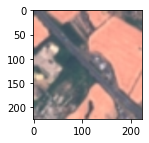

Highway


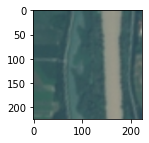

River


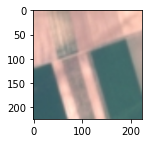

AnnualCrop


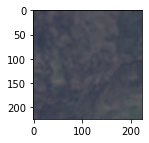

HerbaceousVegetation


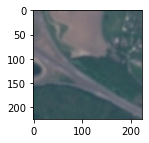

Highway


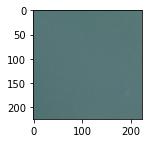

SeaLake


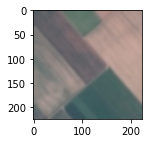

AnnualCrop


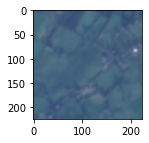

Pasture


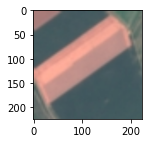

AnnualCrop


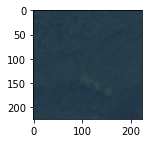

Forest


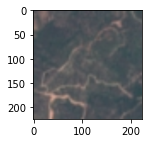

HerbaceousVegetation


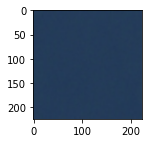

SeaLake


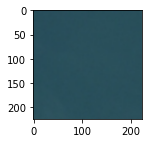

SeaLake


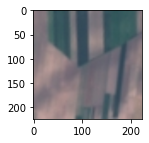

AnnualCrop


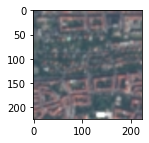

Residential


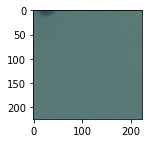

SeaLake


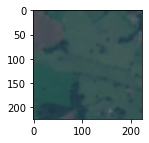

Pasture


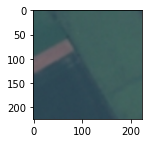

AnnualCrop


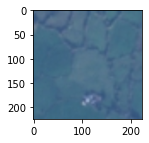

Pasture


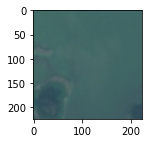

SeaLake


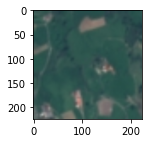

Pasture


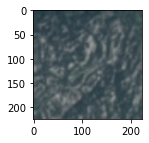

HerbaceousVegetation


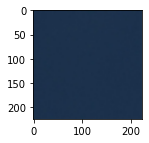

SeaLake


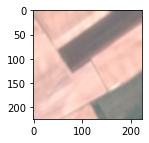

AnnualCrop


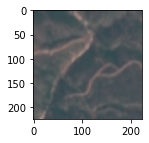

HerbaceousVegetation


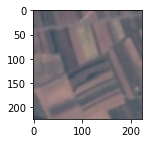

PermanentCrop


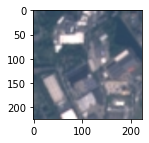

Industrial


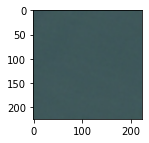

SeaLake


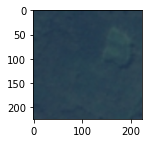

Forest


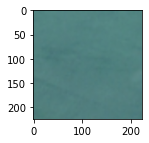

SeaLake


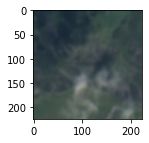

HerbaceousVegetation


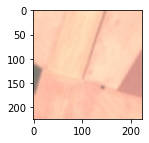

AnnualCrop


In [13]:
batch_np = example_batch.numpy()
for i in range(BATCH_SIZE):
    plt.figure(figsize=(2, 2))
    plt.imshow(batch_np[i, ...].transpose(1, 2, 0))
    plt.show()
    print(dataset.classes[example_labels[i]])

## Извршавање модела над појединачним примерима

Када имамо припремљене податке у облику у којем их модел очекује, можемо јако једноставно да добијемо предикцију за сваку од слика. Најпре селектујемо прву слику у хрпи <code>example_batch[0:1, ...]</code>, где три тачке за остале координате означавају да их узимамо без измена. Модел онда позовемо као најобичнију функцију над тим подацима - резултат ће бити предикције.

In [14]:
with torch.no_grad():
    prediction = model(example_batch[0:1, ...])

C:\Users\mistojan\src\venvs\face-synthetics\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [15]:
prediction

tensor([[ -3.1037, -11.7114,  -4.8120,  22.1648,   2.4975,  -4.7359,   0.0357,
          -4.5473,   8.4084,  -3.3049]])

Погледајте резултат предикција - модел је за дату улазну слику дао 10 вредности на излазу. Као што смо раније рекли, свака од датих вредности одговара једној од класа. 

Вежба 1: Утврдити сами коју класу је предвидео модел и да ли је та предикција тачна.

Вежба 2: Промените ћелије изнад тако да дају предикцију за другу по реду слику у хрпи. Поновите вежбу 1 за тај излаз.

У ћелијама испод ћемо програмским путем извести претходну вежбу и као излаз дати коју класу је модел предвидео.

Дакле, занима нас на ком индексу у вектору предикција се налази максимална вредност активације излазних неурона - математичким формализмима речено - неопходан нам је *argmax*.

In [16]:
max_val, argmax = torch.max(prediction, 1)

In [17]:
argmax

tensor([3])

Индексирање класа почиње од 0, а листа класа је дата у првој ћелији ове вежбанке. Хајде да видимо којој класи одговара предикција, а којој очекивана вредност (лабела)

In [18]:
print(classes[argmax])
print(classes[example_labels[0]])

Highway
Highway


Модел је тачно предвидео класу! Можете се сами играти и видети како предвиђа остале слике из учитане хрпе - модификацијом примера кода изнад.

Можда вам је већ интуитивно да, с обзиром да модел предвиђа скор за сваку од класа, је могуће дати и естимацију вреоватноће са којом је модел сигуран у своју предикцију. У машинском учењу се за те потребе најчешће користи *sofmax* функција у коју нећемо даље залазити, али је довољно запамтити да она вектор скорова претвар у апроксимативну расподелу вероватноће.

In [19]:
with torch.no_grad():
    softmax = F.softmax(prediction, dim=1)

Ако сада узмемо вредност апроксимативне вероватноће на месту предикције - видећемо да је модел практично потпуно сигуран у своју предикцију (вероватноћа је блиска 1). Ово је донекле и очекивано с обзиром да валидациони скуп података потпуно кореспондира тренирајућем. С друге стране, када дођемо до обраде података из Србије, видећете да модел неће бити тако сигуран у своје предикције.

In [20]:
print(float(softmax[0, argmax]))

0.999998927116394


## Процесирање у хрпама (енг. *batch processing*)

Једна од супер моћи које нам омогућавају наменски процесори са пуно језгара (као што су графичке картице) је прцесирање веће хрпе података у паралели. Тиме се за теоријски исто време одједном обрађује велика количина података.

Овакав вид обраде је најприроднији у пакету <code>torch</code>, и заправо је само довољно моделу проследити целокупан учитани batch и добићемо резултат. Слично, израчунавање argmax-a се спроводи без измена и над хрпом предикција

In [21]:
with torch.no_grad():
    predictions = model(example_batch)

In [22]:
max_val, argmax = torch.max(predictions, 1)

Хајде да упоредимо низ предвиђених индекса класа са лабелама за целу учитану хрпу.

In [23]:
print(argmax)
print(example_labels)

tensor([3, 8, 0, 2, 3, 9, 0, 5, 0, 1, 2, 9, 9, 0, 7, 9, 5, 0, 5, 9, 5, 2, 9, 0,
        2, 6, 4, 9, 1, 9, 2, 0])
tensor([3, 8, 0, 2, 3, 9, 0, 5, 0, 1, 2, 9, 9, 0, 7, 9, 5, 0, 5, 9, 5, 2, 9, 0,
        2, 6, 4, 9, 1, 9, 2, 0])


Пробајте сами да напишете команду која враћа укупан број предикција. Да ли је он очекиван и зашто?

In [24]:
# Решење
# len(argmax)
# ili
# argmax.shape

На исти начин као и раније ћемо за целу хрпу приказати апроксимативне расподеле вероватноћа израчунате softmax функцијом. Овај пут ћемо исштампати цео вектор. Видимо да за сваку од 32 улазне слике имамо по 10 вредности.

In [25]:
with torch.no_grad():
    softmaxes = F.softmax(predictions, dim=1)

print(softmaxes)

tensor([[1.0617e-11, 1.9399e-15, 1.9237e-12, 1.0000e+00, 2.8747e-09, 2.0757e-12,
         2.4517e-10, 2.5066e-12, 1.0609e-06, 8.6829e-12],
        [3.7828e-04, 4.3271e-06, 2.3746e-07, 1.8257e-04, 4.2639e-06, 2.3032e-05,
         2.1748e-06, 6.1341e-07, 9.9920e-01, 2.0025e-04],
        [9.9988e-01, 1.1681e-08, 2.0134e-08, 1.1261e-05, 2.3045e-07, 3.3565e-06,
         3.8835e-05, 2.3027e-08, 6.3941e-05, 1.0029e-07],
        [1.7455e-04, 7.6217e-04, 9.9319e-01, 1.6963e-05, 1.3062e-05, 5.9099e-04,
         5.1270e-03, 8.5317e-05, 8.2149e-06, 3.1584e-05],
        [3.6404e-08, 3.7629e-10, 3.8279e-08, 9.9975e-01, 1.9204e-06, 1.3151e-07,
         2.6295e-07, 1.7250e-07, 2.4284e-04, 3.3014e-07],
        [9.6631e-06, 1.1062e-05, 2.0579e-06, 7.8792e-09, 1.5512e-09, 3.6191e-07,
         7.1304e-10, 8.1398e-09, 4.6139e-08, 9.9998e-01],
        [9.9922e-01, 3.1939e-07, 1.7265e-06, 1.1031e-04, 5.2308e-06, 2.9913e-05,
         3.9759e-04, 1.1306e-06, 2.3447e-04, 3.1273e-06],
        [2.6184e-07, 6.2368

## Анализа сигурности модела

Као што смо навели, излаз softmax-а се може интерпретирати као апроксимативна расподела вероватноће. Команде испод израчунавају такву вероватноћу (скор) предикције за сваки од 32 улаза у мрежу.

Уочите која је најмања вероватноћа предикције - на већем скпу већ можемо уочити да на појединим примерима модел није потпуно сигуран.

In [26]:
all_scores = np.take_along_axis(softmaxes.numpy().T, np.expand_dims(argmax.numpy(), 0), 0)
print(all_scores)

[[0.9999989  0.9992042  0.99988234 0.9931901  0.99975437 0.9999769
  0.9992163  0.99992204 0.9997706  0.99997973 0.9912237  0.99999726
  0.9999697  0.99487275 0.999998   0.99998915 0.99998176 0.9871688
  0.99998164 0.99288964 0.9999436  0.9996501  0.9999995  0.99973434
  0.9964514  0.7814647  0.9999932  0.99992096 0.99986696 0.9883581
  0.99830186 0.9999249 ]]


С друге стране, ако израчунамо средњу вредност скора за све предикције, видимо да је модел у глобалу практично поптуно сигуран у своје предикције на валидационом скупу. Запамтите овај број - упоредићемо га са истим на подацима из Србије.

In [27]:
all_scores.mean()

0.99126804

# Мерење квалитета модела

## Извршавање модела над целим валидационим скупом

Ради квантитативног мерења квалитета рада модела неопходно је извршити модел на што већем узорку података - идеално на целом валидационом скупу података. Следећа фукнција управо служи за извршавање модела на већем скупу података.

Већину елемената ове функције смо већ видели у претходним ћелијама и у зависности од вашег предзнања вероватно је можете и у потпуности разумети. Функција пре свега као аргументе прима модел и скуп података над којим треба да се изврши, а као помоћни аргумент прима и <code>max_batches</code> који ограничава број хрпа над којим ће се извршити - што се ради уколико не желите да чекате да се изврши над свим подацима.

Функција ће као повратну вредност дати два низа. Први који представља све лабеле, а други који представља кореспондирајуће предикције.

In [28]:
def predict_on_dataset(model, dataset, max_batches=None):
    model.eval()
    iteration_cnt = 0

    all_preds = list()
    all_labels = list()

    with torch.no_grad():
        for i, data in enumerate(dataset):
            if max_batches is not None and iteration_cnt == max_batches:
                break
            print(f"Процесирам хрпу {i + 1} od {max_batches}")

            inputs, labels = data[0].to(device), data[1].to(device)

            outputs = model(inputs)
            _, pred = torch.max(outputs, 1)

            all_preds += list(pred.data.cpu().numpy())
            all_labels += list(labels.data.cpu().numpy())

            iteration_cnt += 1

    return all_labels, all_preds

Хајде да сада извршимо предикцију модела над валидационим подацима користећи наведену функцију. Ограничили смо да се изврши на укупно 20 хрпа, што је прихватљив број за већину процесора али ће те свакако морати да сачекате неколико минута да се заврши извршење. Идеално, желимо да извршимо на што више податак да би добили репрезентативније метрике. Слободно ставите већи број или <code>None</code> ако имате времена или процесорксе моћи за извршавање.

In [29]:
labels, preds = predict_on_dataset(model, val_loader, 20)

Процесирам хрпу 1 od 20
Процесирам хрпу 2 od 20
Процесирам хрпу 3 od 20
Процесирам хрпу 4 od 20
Процесирам хрпу 5 od 20
Процесирам хрпу 6 od 20
Процесирам хрпу 7 od 20
Процесирам хрпу 8 od 20
Процесирам хрпу 9 od 20
Процесирам хрпу 10 od 20
Процесирам хрпу 11 od 20
Процесирам хрпу 12 od 20
Процесирам хрпу 13 od 20
Процесирам хрпу 14 od 20
Процесирам хрпу 15 od 20
Процесирам хрпу 16 od 20
Процесирам хрпу 17 od 20
Процесирам хрпу 18 od 20
Процесирам хрпу 19 od 20
Процесирам хрпу 20 od 20


Напишите сада сами команде које штампају колико имамо обрађених лабела и предикција. Погледајте у ранијим ћелијама колики су то бројеви за цео валидациони скуп.

In [30]:
# Решење
# print(len(labels))
# print(len(preds))

## Квантитативне метрике

Коначно, прелазимо на квантитаивне метрике квалитета рада модела. Само израчунавање метрика је поптпуно подржано ако користите пакет <code>sklearn</code>, и неопходно је само позвати адекватне функције.

Најпре ћемо позвати функцију <code>classification_report</code> која управо прима низове лабела и предикција које смо већ изгенерисали. Као што и само име функције наговештава, она ће као излаз дати стандардизован извештај са метрикама за један модел машинског учења.

In [31]:
print(metrics.classification_report(labels, preds))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        65
           1       0.97      1.00      0.99        73
           2       0.95      0.97      0.96        80
           3       0.97      1.00      0.98        57
           4       1.00      1.00      1.00        71
           5       1.00      0.94      0.97        53
           6       0.97      0.90      0.93        67
           7       1.00      0.99      0.99        68
           8       0.98      1.00      0.99        46
           9       0.97      1.00      0.98        60

    accuracy                           0.97       640
   macro avg       0.97      0.97      0.97       640
weighted avg       0.97      0.97      0.97       640



Ако гледамо редове излаза примећуемо да прво имамо метрике за сваку од класа (првих 10 редова), а онда и усредњене вредности (задња три реда). Две најпрепознатљивије метрике су прецизност (енг. precission) i одзив (енг. recall). **Прецизност** описује у којој мери је од свих датих предикција за неку класу модел тачно предвидео ту класу. **Одзив** описује колико је од свих постојећих примера неке класе модел дао предикција за ту класу (не улазећи у то да ли су оне тачне или не).

Кад се мало размисли постаје очигледно да су прецизност и одзив донекле супростављени, те повећање једног најчеће смањује друго - на шта указују и резултати које смо добили.

## Матрица конфузије

Други, јако често коришћен, начин за представу резултата класификатора је матрица конфузије. Као што и само име наговештава у питању је алат који нам служи да добијемо увид у то шта "збуњује" наш модел. Конкретно, то је матрица где за сваку дату предикцију имамо која је тачна и која је предвиђена, па је лако увидети где долази до забуне.

За дате лабеле и предикције, матрица конфузије се једноставно добија позивом функције из пакета <code>sklearn</code>. Додуше, резултат је јако сувопарана матрица, па ћемо у следећој ћелији позвати функције које исту ту матрицу приказују мало лепоше визуелно.

In [32]:
metrics.confusion_matrix(labels, preds)

array([[61,  0,  1,  0,  0,  0,  1,  0,  1,  1],
       [ 0, 73,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 78,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0, 57,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 71,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  0, 50,  0,  0,  0,  1],
       [ 4,  0,  1,  2,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 67,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 46,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 60]], dtype=int64)

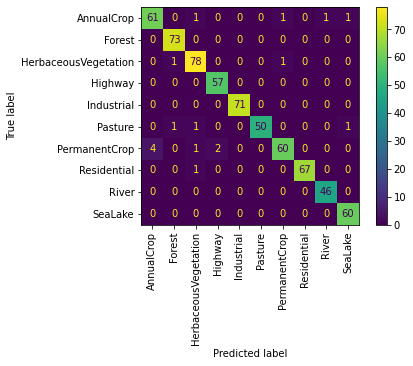

In [33]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(labels, preds), display_labels=classes).plot()
plt.xticks(rotation=90)
plt.show()

За сваку од класа је дата једна врста која представља тачне лабела и једна колона која представља прдикције. Тачне прдикције се формирају на дијагонали матрице, јер тада је управо лабела врсте једнака лабели колоне. Све грешке модела видимо ван дијагонале матрице. Анализа постаје интересантна када уочавамо ситуације где модел често греши између неке две класе.

На примеру изнад, можете уочити да је највећи број ван дијагонале матрице у првој колони и седмој врсти. Уочавамо да је то ситуације када је тачна лабела "PermanentCrop" (стални усеви) а предвиђена лабела "АnnualCrop" (једногодишњи усеви). Ово је чак и потпуно очекивано јер заиста и јесте тешко разликовати два типа усева, док је рецимо много лашке разликовати насеље од усева.

Која је друга најчешћа грешка модела? Размислите зашто ту модел греши? 

# Учитавање података за Србију са сателита Сентинел 2

Сада ћемо наш модел за класификацију намене земљишта применити на подацима из Србије. Као и за базу на којој је модел трениран, користићемо Сентинел 2 податке али регије која одговара србији. У овом примеру смо изабрали Сентинел 2 снимке шире околине Шапца од 30. јуна 2021. године.

## Учитавање једног Сентинел 2 производа у RGB домену

Сами подаци који представљају Сентинел 2 производе када се распакују садрже велики број снимака и метаподатака. У овој вежбанци ћемо се превасходно фокусирати на слике у видљивом спектру боја (практично стандардне слике какве свакодневно гледамо). Сам сателит има инструмент који снима у више спектралних опсега (енг. spectral bands), а нама су од интереса они који снимају на таласним дужинама црвене зелене и плаве боје који су довољни за формирање слике у боји. У питању су спектрални опсези са индексима b02, b03 i b04.

In [34]:
img_path_b02 = r"C:\Users\mistojan\Downloads\S2A_MSIL2A_20210630T093041_N0301_R136_T34TCQ_20210630T122807\S2A_MSIL2A_20210630T093041_N0301_R136_T34TCQ_20210630T122807.SAFE\GRANULE\L2A_T34TCQ_A031450_20210630T093134\IMG_DATA\R10m\T34TCQ_20210630T093041_B02_10m.jp2"
img_path_b03 = r"C:\Users\mistojan\Downloads\S2A_MSIL2A_20210630T093041_N0301_R136_T34TCQ_20210630T122807\S2A_MSIL2A_20210630T093041_N0301_R136_T34TCQ_20210630T122807.SAFE\GRANULE\L2A_T34TCQ_A031450_20210630T093134\IMG_DATA\R10m\T34TCQ_20210630T093041_B03_10m.jp2"
img_path_b04 = r"C:\Users\mistojan\Downloads\S2A_MSIL2A_20210630T093041_N0301_R136_T34TCQ_20210630T122807\S2A_MSIL2A_20210630T093041_N0301_R136_T34TCQ_20210630T122807.SAFE\GRANULE\L2A_T34TCQ_A031450_20210630T093134\IMG_DATA\R10m\T34TCQ_20210630T093041_B04_10m.jp2"

Функција испод учитава сваки од снимака за појединачну боју и онда их комбинује једну слику. Када је позовемо над путањама за сваку од слика имаћемо учитан целокупан снимак у боји. Слике су јако велике, па овај корак може потрајати који минут.

In [35]:
def load_sentinel_2_image_rgb(img_path_b02, img_path_b03, img_path_b04):
    img_b02 = cv2.imread(img_path_b02, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
    img_b03 = cv2.imread(img_path_b03, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
    img_b04 = cv2.imread(img_path_b04, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)

    rgb = np.zeros((img_b02.shape[0], img_b02.shape[1], 3))
    rgb[:, :, 0] = img_b04
    rgb[:, :, 1] = img_b03
    rgb[:, :, 2] = img_b02

    rgb = rgb.astype(np.uint16)

    return rgb

In [36]:
image = load_sentinel_2_image_rgb(img_path_b02, img_path_b03, img_path_b04)

## Припрема исечка Сентинел 2 сникма за процесирање

Најпре је неопходно припремити учитану слику за обраду путем наше неуралне мреже. Јасно је да је слика веома велика, па ћемо процесирати њене исечке. Поред тога, иако се база на којој је модел трениран састоји од Сентинел 2 снимака, ипак осветљеност, сенке и угао снимања није скроз исти па постоје одређене перциптивне разлике између тих података и података за Србију. Када посотји разлика у подацима на којима је модел трениран и на којима се извршава кажемо да постоји **доменска различитос** (енг. domain discrapancy). Наравно пожељно је да домен на којем се тренира буде што сличнији домену на коме се модел тестира, што и овде јесте случај. 

**Доменска различитост је један од фундаменталних проблема са којим се сусрећемо када примењујемо машинско учење у пракси.** Самим тим, постоји читава лепеза техника које се користе да се преброди доменска различитост и да се модел прилагоди новом домену - оне се здружено називају **доменска адаптација** (енг. domain adaptation). 


Ми ћемо ради доменске адаптације применити најједносавнију варијанту где ћемо улзаним сликама мало променити контраст и осветљеност тако да боље одговарају обсервацијама за Србију. То је поента функције испод. Сами параметри модификације су ручно изабрани посматрајући оба домена слика, мада је потпуно могуће и пожељно у пракси ово урадити на систематичан начин. Такође у зависности од примене, потребно је применити и сложеније технике доменске адаптације.

In [37]:
def prepare_rgb(image):
    p_low, p_high = np.percentile(image, (1, 99))
    image = exposure.rescale_intensity(image, in_range=(p_low, p_high))
    image = image / image.max()
    
    image = exposure.adjust_gamma(image, 0.9)
    image += 0.05
    image = np.clip(image, 0.0, 1.0)

    return image

Сада ћемо изабрати исечак снимка Србије са којим ћемо радити. У питању је исечак величине 512x512 пиксела, а ми ћемо за почетак узети севернији део Шапца са делом реке Саве и обрадивим равничарским пределом са друге стране реке.

Можете се и сами играти и мењати прозор исечка који узимамо. Неки од предлога су дати у коментару испод, а можете и пробати неки свој.

In [38]:
# Шабац - севернији део и река Сава
CROP_START_COL = 9584
CROP_START_ROW = 4060
CROP_SIZE = 512

# Шабац - јужнији део
# CROP_START_COL = 9423
# CROP_START_ROW = 4329
# CROP_SIZE = 512

# Рума - јужни део
# CROP_START_COL = 10383
# CROP_START_ROW = 1626
# CROP_SIZE = 512

# Јарак - цело место и меандар Саве
# CROP_START_COL = 9929
# CROP_START_ROW = 2348
# CROP_SIZE = 512

# Вештачко језеро Ровни
# CROP_START_COL = 9721
# CROP_START_ROW = 9908
# CROP_SIZE = 512

sample_image_1 = image[CROP_START_ROW:CROP_START_ROW+CROP_SIZE, CROP_START_COL:CROP_START_COL+CROP_SIZE, :]

Прикажимо сада издвојени исечак.

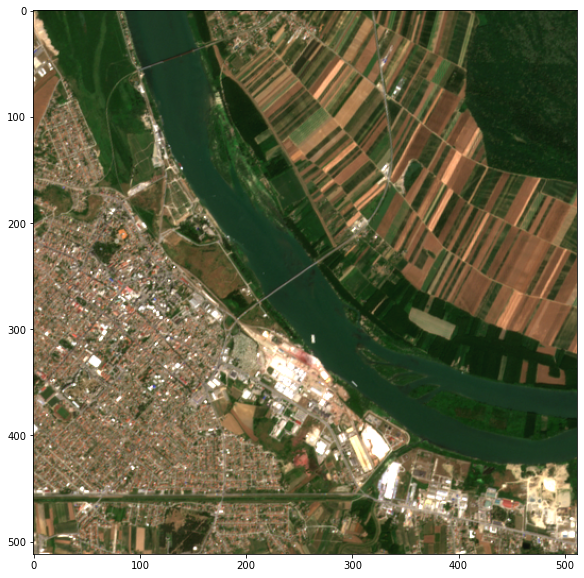

In [39]:
plt.figure(figsize=(10, 10))
plt.imshow(prepare_rgb(sample_image_1))

# Извршавање модела над подацима за Србију

## Припрема података за потребе модела

Као што знамо, наш модел машинског учења као улаз узима слике величине 64x64, док је наш исечак величине 512x512. Да би смо обрадили цео исечак мормао га поделити у мање исечке величине 64x64. Таквих исечака ће бити 8 по дужини и 8 по ширини, што значи укупно 64. Можда већ и назирете да ће тих 64 мања исечака чинити хрпу коју ћемо као тавку дати мрежи и од ње добити одговарајући број предикција.

Функције испод се баве управо овом припремом. Конкретно, функција <code>get_images</code> дати исечак дели у скуп малих плочица величине 64x64, а функција <code>prepare_images_for_dnn</code> пакује ту хрпу плочица у тензор адекватне величине коју вештачка неурална мрежа може да прихвати.

In [40]:
def get_images(image):
    image = prepare_rgb(image)

    rows = image.shape[0] // 64
    cols = image.shape[1] // 64
    all_tiles = np.zeros((rows * cols, 64, 64, 3), dtype=np.float32)

    for r in range(rows):
        for c in range(cols):
            all_tiles[r + rows * c, ...] = image[r*64:r*64+64, c*64:c*64+64, :]
    
    return all_tiles

def prepare_images_for_dnn(images):
    images_prepared = torch.zeros((images.shape[0], 3, 224, 224))

    for i in range(images.shape[0]):

            image_resized = cv2.resize(images[i, ...], (224, 224))
            img_normalized = image_resized.transpose(2, 0, 1).astype(np.float32)

            images_prepared[i, ...] = torch.from_numpy(img_normalized)

    return images_prepared

In [41]:
all_tiles = get_images(image[CROP_START_ROW:CROP_START_ROW+CROP_SIZE, CROP_START_COL:CROP_START_COL+CROP_SIZE, :])
tiles_prepared_for_dnn = prepare_images_for_dnn(all_tiles).to(device)

## Извршавање модела

Модел над овако припремљеним подацима из Србије извршавамо на исти начин као и у ранијим секцијама.

In [42]:
with torch.no_grad():
    pred = model(tiles_prepared_for_dnn)

In [43]:
_, argmax = torch.max(pred, 1)

In [44]:
argmax

tensor([4, 7, 7, 7, 7, 7, 7, 4, 9, 8, 6, 7, 7, 7, 7, 7, 3, 9, 8, 8, 7, 7, 7, 7,
        7, 0, 6, 8, 3, 4, 7, 7, 6, 0, 6, 3, 8, 4, 4, 6, 6, 6, 6, 6, 0, 8, 4, 4,
        0, 0, 6, 0, 0, 8, 8, 4, 1, 1, 0, 0, 0, 8, 8, 4])

In [45]:
with torch.no_grad():
    softmaxes = F.softmax(pred, dim=1).cpu()

## Анализа сигурности модела

Анализу сигурности модел такође спроводимо као и у ранијим поглављима, али ће овде бити јако интересантно упоредити са резултатим од раније

In [46]:
all_scores = np.take_along_axis(softmaxes.numpy().T, np.expand_dims(argmax.numpy(), 0), 0)
print(all_scores)

[[0.28714052 0.99255097 0.99988437 0.99999654 0.99999726 0.84850115
  0.9999993  0.5522834  0.7030461  0.5255811  0.89717245 0.9999397
  0.9995536  0.9999969  0.9999994  0.98643523 0.45484185 0.9644964
  0.9998373  0.59635746 0.7072009  0.7328156  0.99999774 0.98855084
  0.5047223  0.97150755 0.24233337 0.7680217  0.6728504  0.9999906
  0.95893246 0.99998343 0.91004765 0.9227216  0.52570987 0.84776026
  0.82162917 0.56186706 0.999752   0.99741226 0.9826607  0.93476874
  0.6480117  0.8610074  0.85560554 0.9984549  0.99504954 0.94746214
  0.6534794  0.8140811  0.7918098  0.7742024  0.9847025  0.9995018
  0.99851817 0.85900277 0.89284736 0.9786476  0.7984398  0.93689704
  0.98762786 0.9812507  0.9982487  0.98680216]]


In [47]:
all_scores.mean()

0.8531328

Самостално анализирајте просечну сигурност модела у његове предикције и упоредите је са раније добијеном сигурношћу када се модел извршавао на валидационом скупу. Дакле, у питању је идентичан модел, примењен на различитим скупом податкаа. 

**Даје анализу и интерпретацију зашто постоје ове разлике?** Узмите у обзир шта би се десило да нисмо применили никакву доменску адаптацију (чак можете и пробати да је искључите и видите шта би се десило)

## Визуелизација резултата

С обзиром да за податке из Србије немамо лабеле, није могуће урадити квантитатвину анализу тачности модела. Зато ћемо се задржати на квалитативној анализи посматрајући резултате модела и видети да ли они одговарају реалности. За овакву анализу је потребно дати што бољу визуелизацију резултат, што ћемо и учинити у овој секцији.

Сваку од класа које модела предвиђа ћемо представити једном бојом да би се јасније видела на растерској подлози. Испод су за сваку од постојећих класа придружене боје у виду триплета који означавају црвену, плаву и зелену боју. Намерно смо ставили да поједине јако сличне класе имају исту боју - но, осећајте се потпуно слободно да вредности испод измените по жељи.

In [48]:
classes_to_rgb = { 
                'Highway': (1.0, 0.5, 0), 
                'Industrial': (1.0, 0, 0.5),
                'Residential': (1.0, 0, 0), 

                'AnnualCrop': (0, 1.0, 0.5),
                'PermanentCrop': (0, 1.0, 0.5),
                'Forest': (0, 1.0, 0),
                'HerbaceousVegetation': (0, 1.0, 0),
                'Pasture': (0, 1.0, 0),
                
                'River': (0.5, 0, 1.0),
                'SeaLake': (0.5, 0, 1.0)}

Функције испод служе за лепу визуелизацију резултата. Уколико добро познајете пајтон, требало би углавном да можете самостално да их разумете, мада то и није неопходно.

In [49]:
def show_results_tiles(all_tiles, predictions_argmax, classes):
    for idx, prediction in enumerate(predictions_argmax):
        plt.figure(figsize=(2, 2))
        plt.imshow(all_tiles[idx])
        plt.show()
        print(classes[prediction])

def show_results_tiles_semantic(all_tiles, predictions_argmax, classes, softmaxes, num_rows):
    # I am packing them row majro
    img = np.zeros((num_rows * 64, (all_tiles.shape[0] // num_rows) * 64, 3))
    img_sem = np.zeros((num_rows * 64, (all_tiles.shape[0] // num_rows) * 64, 3))
    img_conf = np.zeros((num_rows * 64, (all_tiles.shape[0] // num_rows) * 64, 3))
    for idx, prediction in enumerate(predictions_argmax):
        img[(idx % num_rows) * 64 : (idx % num_rows + 1) * 64 , (idx // num_rows) * 64 : (idx // num_rows + 1) * 64, :] = all_tiles[idx] #if classes[prediction] in ["Residential", "Industrial"] else [0, 0, 0]
        img_sem[(idx % num_rows) * 64 : (idx % num_rows + 1) * 64 , (idx // num_rows) * 64 : (idx // num_rows + 1) * 64, :] = classes_to_rgb[classes[prediction]] #if classes[prediction] in ["Residential", "Industrial"] else [0, 0, 0]
        img_conf[(idx % num_rows) * 64 : (idx % num_rows + 1) * 64 , (idx // num_rows) * 64 : (idx // num_rows + 1) * 64, :] = softmaxes[idx, argmax[idx]]
    
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.show()
    plt.figure(figsize=(10, 10))
    plt.imshow(img * 0.7 + img_sem * 0.3)
    plt.show()
    plt.figure(figsize=(10, 10))
    plt.imshow(img_sem)
    plt.show()
    plt.figure(figsize=(10, 10))
    plt.imshow(img_conf)

Хајде сада да коначно погледмао визуелизације резултата. Добићемо четири слике:

* Исечак који обрађујемо
* Преклопљене предвиђене лабеле класа у дефинисаним бојама над улазном сликом
* Чисте предвиђене лабеле без преклопа
* Матрица где светлина ћелије означава сигурност модела. Тамније ћелије означавају мању сигурност.

Погледајте резултате детљано. Уочите да ли модел добро разликује појединачне површине. Наравно, лакше је разликовати насеље од оранице, али пак обратите пажњу да ли модел успешно разликује индустрију од насеља, што је тежи задатак. Уочите и да ли модел предвиђа остале класе коректно (рецимо саобраћајнице). Детаљно анализирајте матрицу сигурности модела и размислите зашто је на појединим ћелијама та сигурност смањена.

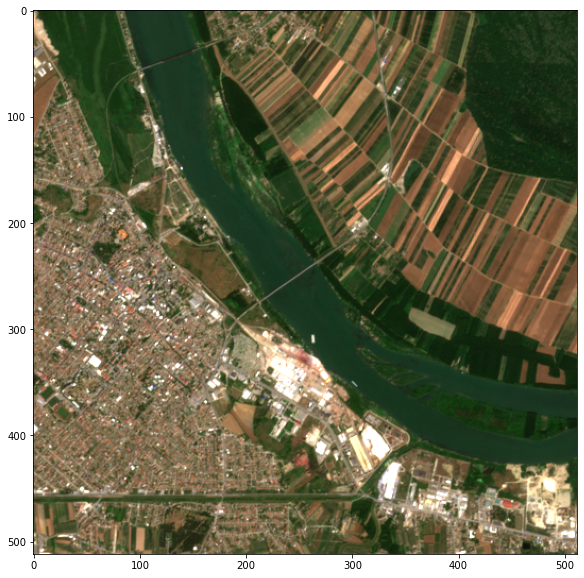

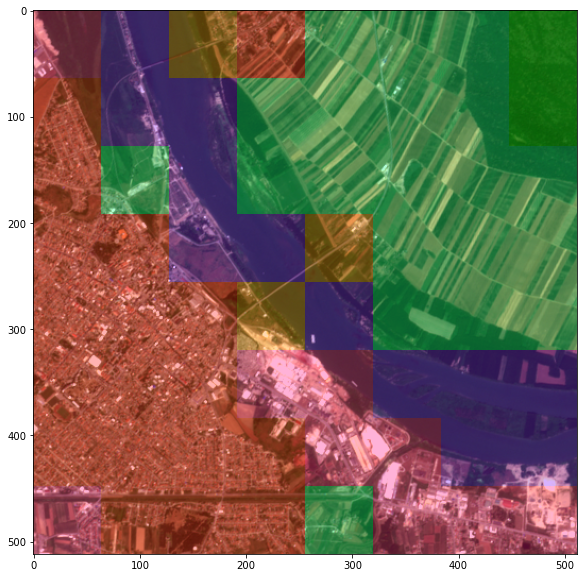

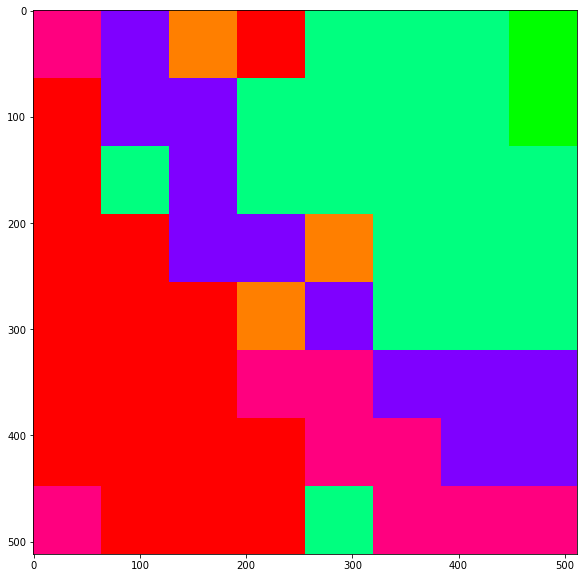

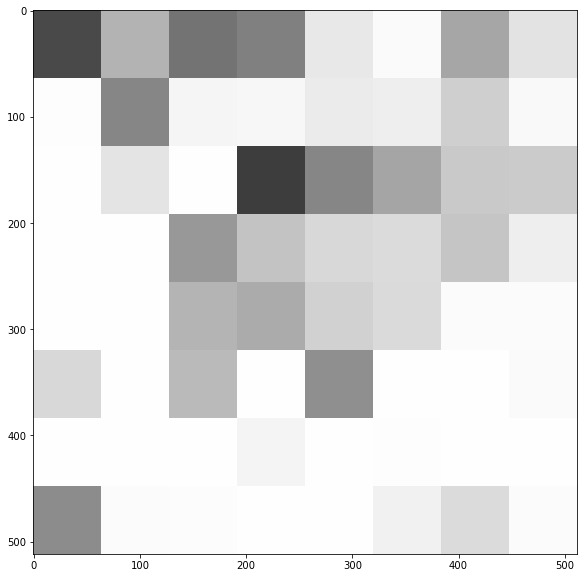

In [50]:
show_results_tiles_semantic(all_tiles, argmax, classes, softmaxes, num_rows=CROP_SIZE // 64)

# Гушћи скуп предикција

У претходној визуелизације смо модел применили на кораку од 64 пиксела, као кад радимо поплочавање - ни једана од улазних плочица модела се не преклапа. Наравно, могуће је постићи и гушћу расподелу предикција тако што ћемо узети мањи корак модела. Управо то је циљ ове секције.

Најпре ћемо модификовати функцију <code>get_images</code> да ујендо и прима корак са који се праве предикције и тиме добиамо функцију <code>get_images_advanced</code>.

In [51]:
def get_images_advanced(image, crop_size=64, stride=32):
    image = prepare_rgb(image)

    rows = image.shape[0] // stride
    cols = image.shape[1] // stride
    all_tiles = np.zeros((rows * cols, crop_size, crop_size, 3), dtype=np.float32)

    for r in range(rows):
        for c in range(cols):
            if r*stride + crop_size > image.shape[0] or c*stride + crop_size > image.shape[1]:
                continue
            all_tiles[r + rows * c, ...] = image[r*stride:r*stride+crop_size, c*stride:c*stride+crop_size, :]
    
    return all_tiles

Функција <code>prepare_images_for_dnn</code> остаје иста и сад те две функције можемо позвати али са кораком 32.

In [52]:
all_tiles_2 = get_images_advanced(image[CROP_START_ROW:CROP_START_ROW+CROP_SIZE, CROP_START_COL:CROP_START_COL+CROP_SIZE, :])
tiles_prepared_for_dnn = prepare_images_for_dnn(all_tiles_2).to(device)

Слично као и у ранијим ћелијама, хајде да извршимо модел. С обзиром да сада треба дати много већи број предикција, очекујте да ће извршавање трајате дуже.

In [53]:
pred = model(tiles_prepared_for_dnn)

In [54]:
_, argmax = torch.max(pred, 1)

Функција испод нам служи за визуелизацију гушћих предикција над улазном мапом. Хајде да погледамо и анализирамо те резултате.

In [55]:
def show_results_tiles_semantic_2(all_tiles_2, predictions_argmax, classes, softmaxes, num_rows, stride):
    plt.figure(figsize=(10, 10))
    plt.imshow(prepare_rgb(sample_image_1) + 0.2)  # Додајемо мало светлине (0.2) да би се тачке лепше виделе на растерској подлози
    for idx, prediction in enumerate(predictions_argmax):
        y = (idx % num_rows) * stride + 32
        x = (idx // num_rows) * stride + 32
        if x >= 512 or y >= 512:
            continue
        plt.scatter(x, y, color=classes_to_rgb[classes[prediction]], s=100)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


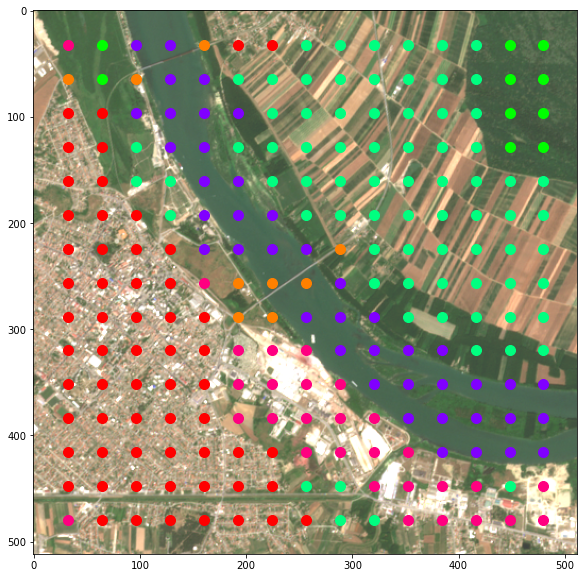

In [56]:
show_results_tiles_semantic_2(all_tiles_2, argmax, classes, None, num_rows=CROP_SIZE // 32, stride=32)

Уочите да ли се са гушћим предикцијама добијају неке разлике. Најпре, свакако се може приметити да са гушћим прдикцијама добијамо много прецизнију детекцију намене површине земље - рецимо сад је река Сава јасније детекована тако да предикције прецизније покривају њено корито.